In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("news.csv")
df

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL  

[6335 rows x 4 columns]

In [3]:
df1=df[["text","title","label"]]

In [4]:
df2=df1.dropna()
len(df2)

6335

In [5]:
df2=df2[df2['label'].str.contains('REAL')|df2['label'].str.contains('FAKE')]
labels=df2.label

In [6]:
labels # as y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [7]:
x1=df2["text"]

In [8]:
from nltk.stem import PorterStemmer
port=PorterStemmer()

In [9]:
#main code
feature=[]
labelinser=[]
for i in  range(len(x1)):
    qx=x1[i].split()
    count=i
    tfidf_vectorizer=TfidfVectorizer(stop_words='english')
    if len(qx)>1:
        nX=tfidf_vectorizer.fit_transform(qx)
        fname=tfidf_vectorizer.get_feature_names()
        #print("vv",count)
        feature.append(fname)
        labelinser.append(labels[i])

In [10]:
featurenew=[]
for i in range(len(feature)):
    first=[]
    for y in feature[i]:
        fd=port.stem(y)
        first.append(fd)
    featurenew.append(first)
        

In [11]:
featurenew # size of feature

[['60',
  'abedin',
  'abus',
  'accus',
  'accus',
  'act',
  'admit',
  'ad',
  'afraid',
  'age',
  'agenc',
  'agent',
  'ago',
  'ahead',
  'aliv',
  'alleg',
  'alli',
  'allow',
  'amend',
  'american',
  'anthoni',
  'apolit',
  'appear',
  'appear',
  'approach',
  'arrog',
  'articl',
  'assault',
  'assault',
  'associ',
  'assum',
  'attack',
  'attack',
  'attack',
  'away',
  'awkward',
  'awkwardli',
  'bad',
  'badli',
  'batch',
  'bathroom',
  'bed',
  'behavior',
  'belief',
  'believ',
  'believ',
  'better',
  'bigger',
  'bizarr',
  'born',
  'boston',
  'breath',
  'breezi',
  'briberi',
  'bring',
  'bureau',
  'buri',
  'cabl',
  'call',
  'campaign',
  'candid',
  'career',
  'carvil',
  'center',
  'chang',
  'charg',
  'circul',
  'claim',
  'claim',
  'claim',
  'classifi',
  'clinton',
  'clinton',
  'clintonworld',
  'close',
  'cnn',
  'column',
  'coma',
  'come',
  'comey',
  'compar',
  'comput',
  'confid',
  'conspiraci',
  'conspiraci',
  'continu'

In [12]:
len(feature),len(labelinser)

(6298, 6298)

In [13]:
f = open('SentiWordNet_3.0.0_20130122.txt')
words2=[]
cols2=[]
for line in f:
    if not line.startswith("#"):
        cols = line.split("\t")
        cols2.append(line.split("\t"))
        
        words_ids = cols[4].split(" ") # 4th is SynsetTerms
        words=[w.split("#")[0] for w in words_ids]
        words2.append(words) # words in all SynsetTerms word
       # print(words)
       

In [14]:
len(words2),len(cols2)

(117660, 117660)

In [15]:
words2[2]

['dorsal', 'abaxial']

In [16]:
positiveall=[]
negativeall=[]
neutralall=[]
xdataq=[] # this is work as x data 
#len(feature) we take only 300 feature
for i in range(300):
    positive=[]
    negative=[]
    neutral=[]
    name=[]
    featurestr=feature[i]
    for word in featurestr:
        for i in range(len(words2)):
            if word in words2[i]:
                pos=float(cols2[i][2])
                neg=float(cols2[i][3])
                net=1-(pos+neg)
                positive.append(pos)
                negative.append(neg)
                neutral.append(net)
    positiveall.append(np.mean(positive))
    negativeall.append(np.mean(negative))
    neutralall.append(np.mean(neutral))
    name.append(round(np.mean(positive),3))
    name.append(round(np.mean(negative),3))
    name.append(round(np.mean(neutral),3))
    xdataq.append(name)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [17]:
xdataq # first column is positive second is negative third is neutral

[[0.071, 0.074, 0.855],
 [0.079, 0.036, 0.885],
 [0.053, 0.037, 0.91],
 [0.055, 0.056, 0.889],
 [0.064, 0.044, 0.892],
 [0.071, 0.057, 0.872],
 [0.077, 0.054, 0.87],
 [0.04, 0.035, 0.924],
 [0.059, 0.046, 0.896],
 [0.05, 0.034, 0.916],
 [0.067, 0.041, 0.892],
 [0.061, 0.067, 0.871],
 [0.057, 0.022, 0.921],
 [0.048, 0.032, 0.92],
 [0.074, 0.012, 0.914],
 [0.067, 0.044, 0.889],
 [0.057, 0.022, 0.921],
 [0.113, 0.054, 0.833],
 [0.061, 0.042, 0.897],
 [0.091, 0.03, 0.879],
 [0.066, 0.043, 0.89],
 [0.043, 0.025, 0.932],
 [0.055, 0.032, 0.912],
 [0.065, 0.054, 0.882],
 [0.075, 0.046, 0.879],
 [0.054, 0.053, 0.893],
 [0.056, 0.049, 0.895],
 [0.079, 0.051, 0.87],
 [0.065, 0.045, 0.89],
 [0.046, 0.034, 0.92],
 [0.029, 0.017, 0.954],
 [0.07, 0.044, 0.887],
 [0.067, 0.051, 0.882],
 [0.045, 0.056, 0.899],
 [0.078, 0.055, 0.867],
 [0.051, 0.032, 0.916],
 [0.068, 0.045, 0.887],
 [0.049, 0.033, 0.918],
 [0.091, 0.055, 0.854],
 [0.064, 0.046, 0.89],
 [0.068, 0.046, 0.887],
 [0.078, 0.066, 0.856],
 [0.

In [18]:
ydata=[]
count=0
for i in labelinser:
    if(count<300):
        ydata.append(i)
    count=count+1

In [19]:
train_x,test_x,train_y,test_y=train_test_split(xdataq,ydata,test_size=0.3,random_state=0)

In [20]:
knn=KNeighborsClassifier(3)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
knnaccuracy=round(knn.score(test_x,test_y),2)*100

In [22]:
knnaccuracy

53.0

In [23]:
#nb
nb_clf=GaussianNB()
nb_clf.fit(train_x,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
nbaccuracy=round(nb_clf.score(test_x,test_y),2)*100
nbaccuracy

59.0

In [25]:
#dt
dt = DecisionTreeClassifier()
dt = dt.fit(train_x,train_y)

In [26]:
dtaccuracy=round(dt.score(test_x,test_y),2)*100
dtaccuracy

53.0

In [27]:
#svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
svmaccuracy=round(svm.score(test_x,test_y),2)*100
svmaccuracy

50.0

In [29]:
#......neural network
nn= MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [30]:
nnaccuracy=round(nn.score(test_x,test_y),2)*100
nnaccuracy

50.0

In [31]:
# accuracy of classifier knn,nb,dt,svm and nn
knnaccuracy,nbaccuracy,dtaccuracy,svmaccuracy,nnaccuracy

(53.0, 59.0, 53.0, 50.0, 50.0)

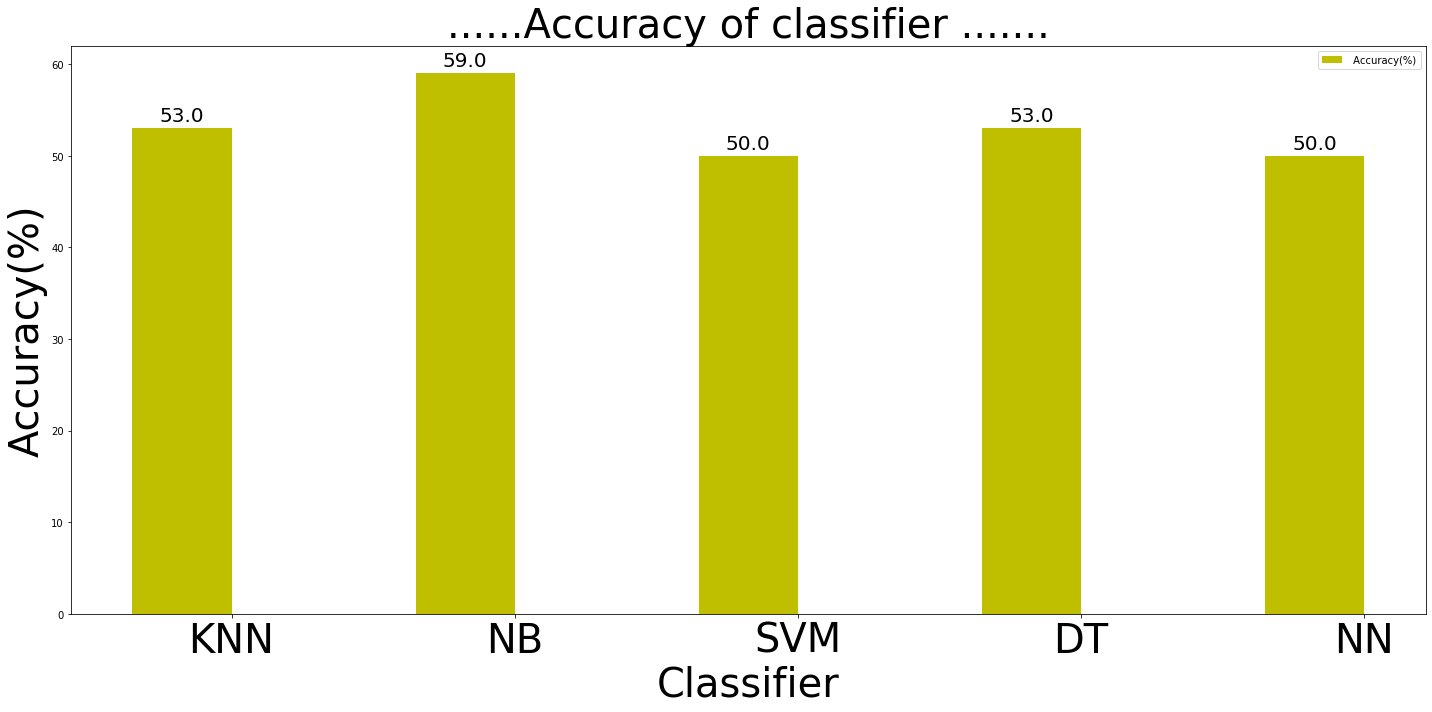

In [32]:
#chart bar graph repesentation using split function

labels = ['KNN', 'NB', 'SVM', 'DT', 'NN']
scorenormal_means = [knnaccuracy,nbaccuracy,svmaccuracy,dtaccuracy,nnaccuracy]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, scorenormal_means, width, label=' Accuracy(%)',color='y')

ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......Accuracy of classifier .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)


fig.tight_layout()

plt.show()












In [33]:
positiveall,negativeall,negativeall # check data

([0.07096814964610718,
  0.07910839160839161,
  0.05304323094425484,
  0.05505952380952381,
  0.06365740740740741,
  0.0710236326806212,
  0.07651679306608884,
  0.040492957746478875,
  0.05873671782762692,
  0.0499003984063745,
  0.06703056768558951,
  0.06145655172413793,
  0.05661925601750547,
  0.0481651376146789,
  0.0744047619047619,
  0.06683392675483216,
  0.05677290836653386,
  0.11255081300813008,
  0.061444511459589866,
  0.09087926509186352,
  0.06623310170562224,
  0.04345493562231759,
  0.055376923076923074,
  0.06454143426294821,
  0.07537774725274725,
  0.05374772956609485,
  0.05575684380032206,
  0.07897196261682243,
  0.06545961002785515,
  0.04591390134529148,
  0.029017857142857144,
  0.06984289617486339,
  0.0673795681063123,
  0.045454545454545456,
  0.07824355158730159,
  0.05136138613861386,
  0.06776629570747218,
  0.048672566371681415,
  0.09094578313253013,
  0.06430635838150289,
  0.06766813671444322,
  0.07811491712707183,
  0.06910294117647059,
  0.056714

In [34]:
# after apply k fold method

In [35]:
#knn 
knn=KNeighborsClassifier(n_neighbors=5)
knn_score=cross_val_score(knn,xdataq,ydata,cv=10)

In [36]:
knn_score=round(np.mean(knn_score)*100,2)
knn_score

57.0

In [37]:
#NB
nb=GaussianNB()
nb_score=cross_val_score(nb,xdataq,ydata,cv=10)

In [38]:
nb_score=round(nb_score.mean()*100,2)

In [39]:
nb_score

54.33

In [40]:
#svm
from sklearn import svm
svm = svm.SVC()
svm_score=cross_val_score(svm,xdataq,ydata,cv=10)

In [41]:
svm_score=round(svm_score.mean()*100,2)

In [42]:
svm_score

52.0

In [43]:
#dt
dt=DecisionTreeClassifier()
dt_score=cross_val_score(dt,xdataq,ydata,cv=10)

In [44]:
dt_score=round(dt_score.mean()*100,2)

In [45]:
dt_score

51.67

In [46]:
#Neural network
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [47]:
nn_score=cross_val_score(nn,xdataq,ydata,cv=10)

In [48]:
nn_score=round(nn_score.mean()*100,2)

In [49]:
nn_score

52.0

In [50]:
#accyracy in Kfold apply 

In [51]:
knn_score,nb_score,svm_score,dt_score,nn_score

(57.0, 54.33, 52.0, 51.67, 52.0)

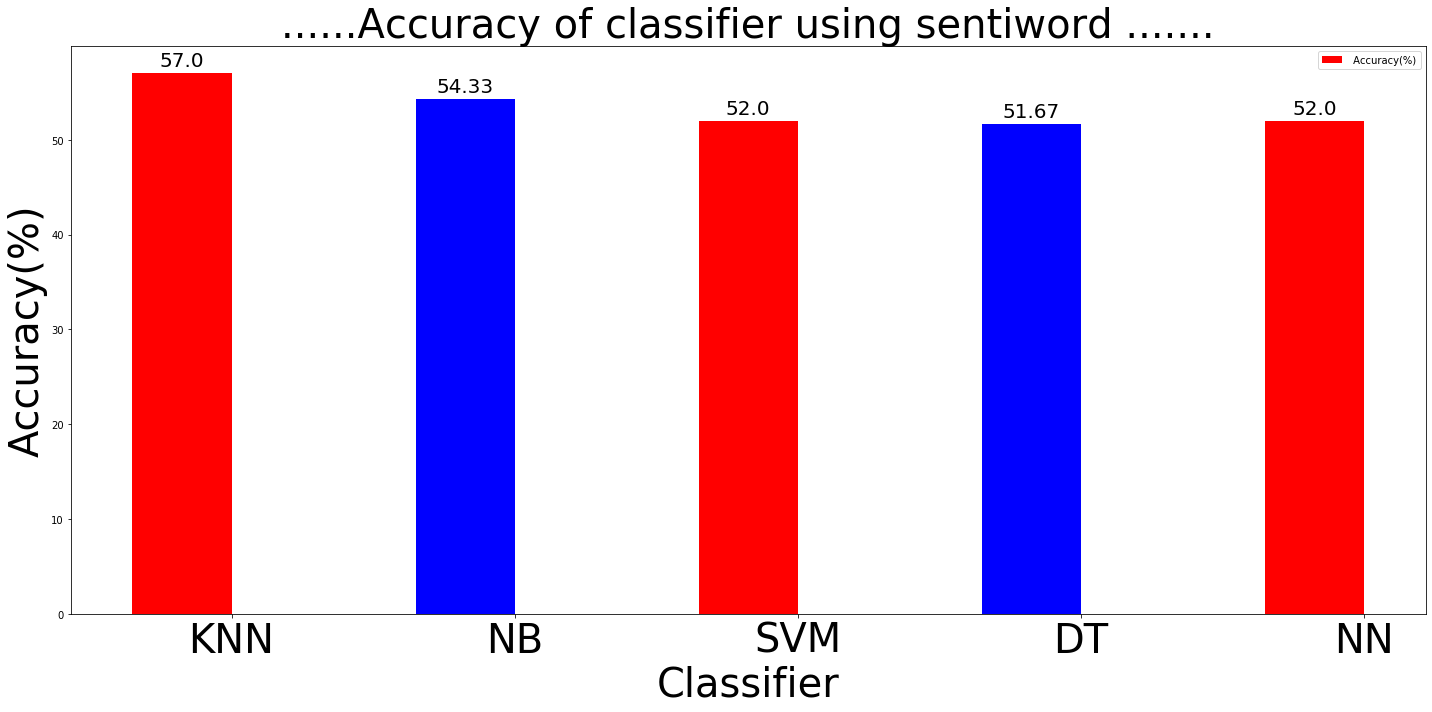

In [92]:
#chart bar graph repesentation after K fold 10 times

labels = ['KNN', 'NB', 'SVM', 'DT', 'NN']
scorenormal_means = [knn_score,nb_score,svm_score,dt_score,nn_score]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, scorenormal_means, width, label=' Accuracy(%)',color='rb')

ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......Accuracy of classifier using sentiword .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)


fig.tight_layout()

plt.show()


In [53]:
#using vader_lexicon

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

In [56]:
xdataq=[] # this is work as x data 
for i in range(len(feature)):
    name=[]
    positive=[]
    negative=[]
    neutral=[]
    f=" ".join(str(x) for x in feature[i])
    #featurestr=feature[i]
    res=sid.polarity_scores(f)
    name.append(res['pos'])
    name.append(res['neg'])
    name.append(res['neu'])
    #print(res)
    xdataq.append(name)

In [57]:
#knn
knn=KNeighborsClassifier()
knn_scorelxn=cross_val_score(knn,xdataq,labelinser,cv=10)
knn_scorelxn=np.mean(knn_scorelxn)
knn_scorelxn=round(knn_scorelxn*100,3)

In [58]:
knn_scorelxn

55.287

In [59]:
nb=GaussianNB()
nb_scorelxn=cross_val_score(nb,xdataq,labelinser,cv=10)
nb_scorelxn=np.mean(nb_scorelxn)
nb_scorelxn=round(nb_scorelxn*100,3)

In [60]:
nb_scorelxn

53.986

In [61]:
#svm
from sklearn.svm import SVC
svm = SVC()
svm_scorelxn=cross_val_score(svm,xdataq,labelinser,cv=10)
svm_scorelxn=np.mean(svm_scorelxn)
svm_scorelxn=round(svm_scorelxn*100,3)

In [62]:
svm_scorelxn

53.906

In [67]:
#dt
dt=DecisionTreeClassifier()
dt_scorelxn=cross_val_score(dt,xdataq,labelinser,cv=10)
dt_scorelxn=np.mean(dt_scorelxn)
dt_scorelxn=round(dt_scorelxn*100,3)

In [68]:
dt_scorelxn

54.097

In [63]:
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [64]:
nn_scorelxn=cross_val_score(nn,xdataq,labelinser,cv=10)
nn_scorelxn=np.mean(nn_scorelxn)
nn_scorelxn=round(nn_scorelxn*100,3)

In [65]:
nn_scorelxn

50.349

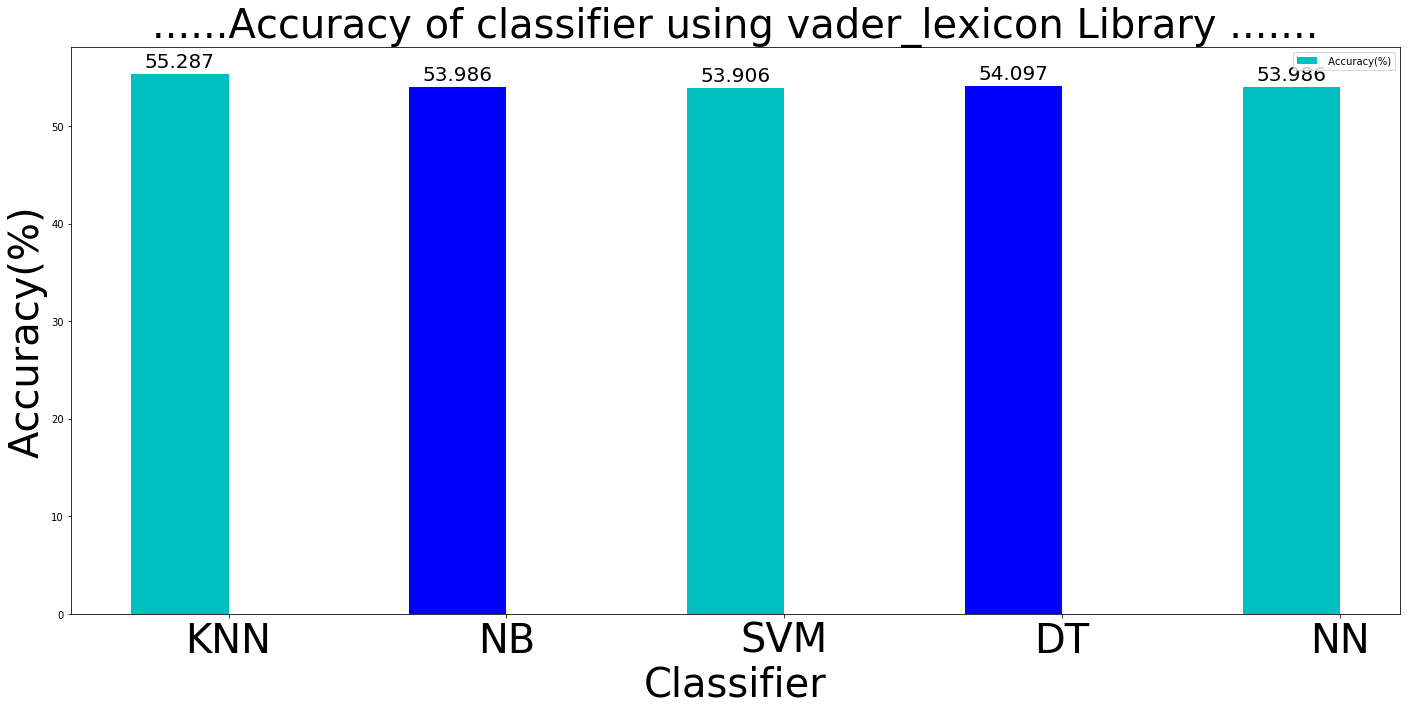

In [88]:
#chart bar graph of lexican library
labels = ['KNN', 'NB', 'SVM', 'DT', 'NN']
scorenormal_means = [knn_scorelxn,nb_scorelxn,svm_scorelxn,dt_scorelxn,nb_scorelxn]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, scorenormal_means, width, label=' Accuracy(%)',color='cb')

ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......Accuracy of classifier using vader_lexicon Library .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)


fig.tight_layout()

plt.show()

In [ ]:
# compare chart bar

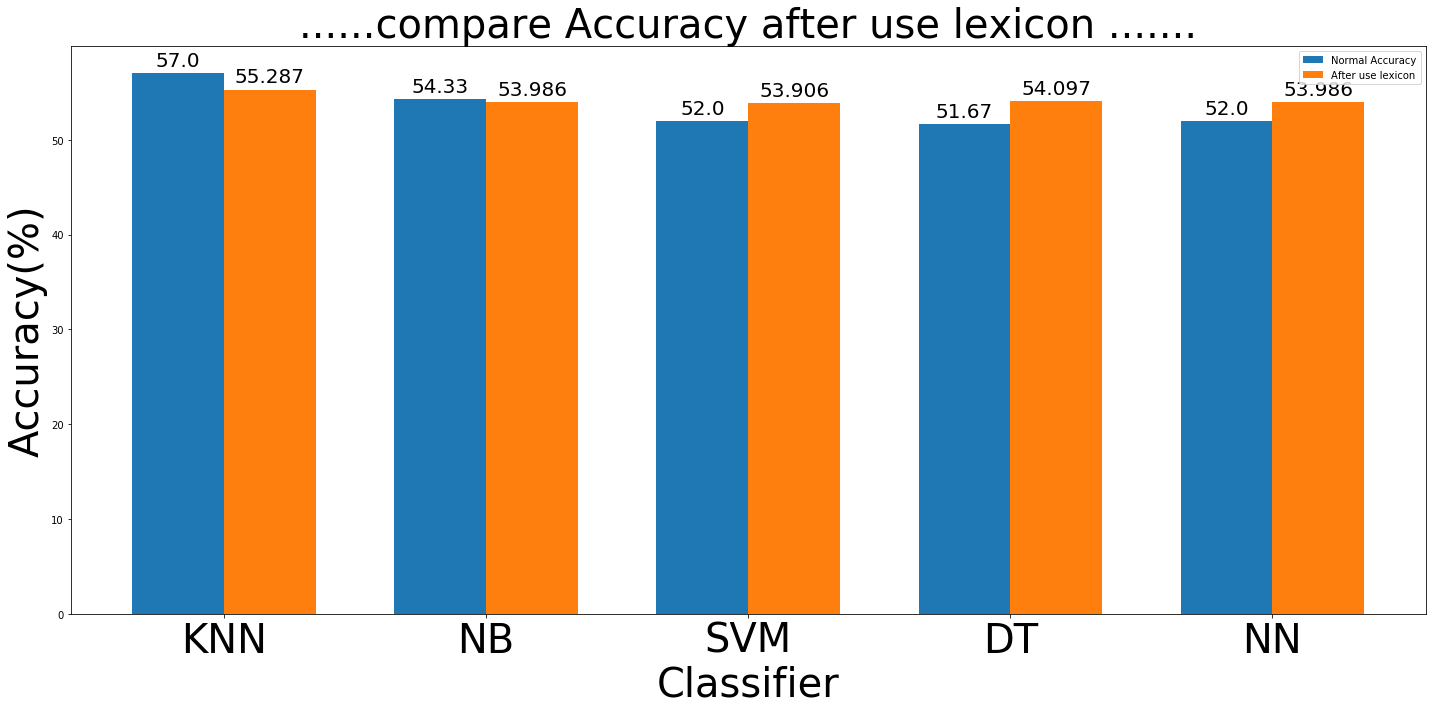

In [80]:

normalacc= [knn_score,nb_score,svm_score,dt_score,nn_score] # acc after k fold
lexiconacc= [knn_scorelxn,nb_scorelxn,svm_scorelxn,dt_scorelxn,nb_scorelxn] # acc using lexicon 


labels = ['KNN', 'NB', 'SVM', 'DT', 'NN']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, normalacc, width, label='Normal Accuracy')
rects2 = ax.bar(x + width/2, lexiconacc, width, label='After use lexicon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......compare Accuracy after use lexicon .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
